# PINN vs SWIM for the Eikonal Equaiton

In [ ]:
# Import required libraries

import numpy as np
import matplotlib.pyplot as plt

from Eikonal_groundtruth import *
from funPINN import *

In [2]:
x_span = -2, 2
u_meas = np.load("datasets/recordedtimes.npy").reshape(-1, 1)
X_meas = np.load("datasets/locations.npy")

Generate the Ground Truth

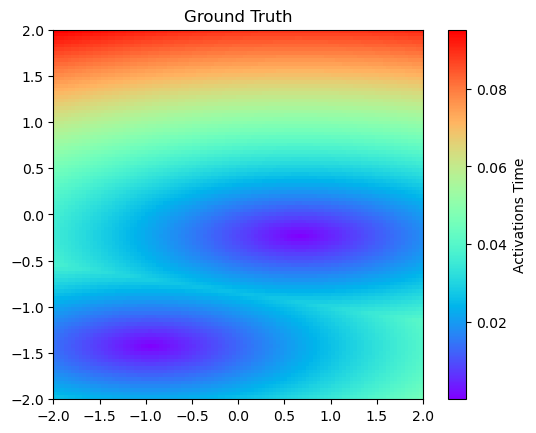

In [3]:
# Per ottenere il Ground Truth è sufficiente chiamare questa funzione
# Tutto il calcolo è contenuto in Eikonal_groundtruth.py
u_true = anysotropic_FMM_fast(x0, y0, t0, x1, y1, t1, Cv, r)

plt.imshow(u_true, extent=[*x_span, *x_span], origin="lower", cmap="rainbow")
plt.colorbar(label="Activations Time")  # orientation="horizontal"
plt.title("Ground Truth")
plt.show()

Generate the PINN reconstruction

In [4]:
pinn_pred = pinn_net(X_meas, u_meas)

Training: 100%|██████████| 40000/40000 [01:41<00:00, 395.46it/s]


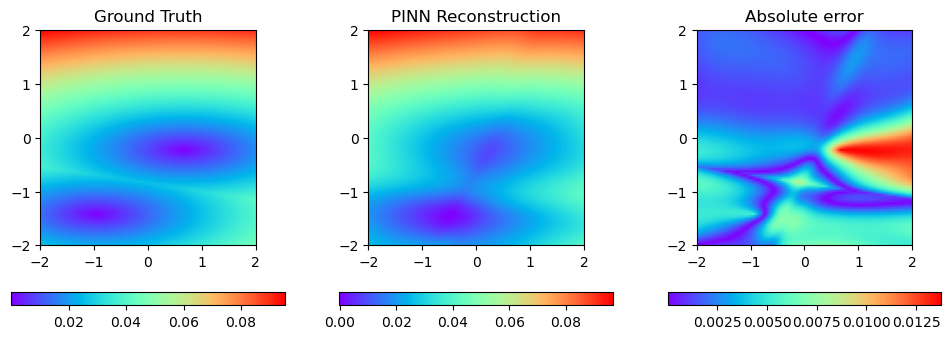

In [6]:
# Visualize predictions of u
data = {"Ground Truth": u_true,
        "PINN Reconstruction": pinn_pred,
        "Absolute error": np.abs(u_true - pinn_pred)}

fig, axes = plt.subplots(1, 3, figsize=(12, 4))
for ax, label in zip(axes, data):
    squared = data[label].reshape(101, 101)
    im = ax.imshow(squared, extent=[*x_span, *x_span], origin="lower", cmap="rainbow")
    ax.set_title(label)
    fig.colorbar(im, ax=ax, orientation="horizontal")